In [2]:
!pip install bs4
!pip install lxml

     |████████████████████████████████| 122kB 5.1MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
     |████████████████████████████████| 5.5MB 15.0MB/s eta 0:00:01


In [3]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np # library to handle data in a vectorized manner
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from scipy.spatial.distance import cdist 


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [4]:
# Convert the table found in the webpage to json with the help of bs4 package
res = requests.get("https://en.wikipedia.org/wiki/Postal_codes_in_Singapore")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

In [5]:
singaporeDistricts = pd.DataFrame(df[0])
singaporeDistricts.head(10)

,Postal district,Postal sector(1st 2 digits of 6-digit postal codes),General location
0,1,"01, 02, 03, 04, 05, 06","Raffles Place, Cecil, Marina, People's Park"
1,2,"07, 08","Anson, Tanjong Pagar"
2,3,"14, 15, 16","Bukit Merah, Queenstown, Tiong Bahru"
3,4,"09, 10","Telok Blangah, Harbourfront"
4,5,"11, 12, 13","Pasir Panjang, Hong Leong Garden, Clementi New..."
5,6,17,"High Street, Beach Road (part)"
6,7,"18, 19","Middle Road, Golden Mile"
7,8,"20, 21","Little India, Farrer Park, Jalan Besar, Lavender"
8,9,"22, 23","Orchard, Cairnhill, River Valley"
9,10,"24, 25, 26, 27","Ardmore, Bukit Timah, Holland Road, Tanglin"


In [6]:
singaporeDistricts = singaporeDistricts.drop(columns = ['Postal sector(1st 2 digits of 6-digit postal codes)'])

In [8]:
singaporeDistricts.head()

,Postal district,General location
0,1,"Raffles Place, Cecil, Marina, People's Park"
1,2,"Anson, Tanjong Pagar"
2,3,"Bukit Merah, Queenstown, Tiong Bahru"
3,4,"Telok Blangah, Harbourfront"
4,5,"Pasir Panjang, Hong Leong Garden, Clementi New..."


In [10]:
singaporeLocations = singaporeDistricts['General location'].str.split(',', expand=True)

In [11]:
singaporeMerged = singaporeDistricts.join(singaporeLocations)

In [12]:
singaporeMerged.head(28)

,Postal district,General location,0,1,2,3
0,1,"Raffles Place, Cecil, Marina, People's Park",Raffles Place,Cecil,Marina,People's Park
1,2,"Anson, Tanjong Pagar",Anson,Tanjong Pagar,None,None
2,3,"Bukit Merah, Queenstown, Tiong Bahru",Bukit Merah,Queenstown,Tiong Bahru,None
3,4,"Telok Blangah, Harbourfront",Telok Blangah,Harbourfront,None,None
4,5,"Pasir Panjang, Hong Leong Garden, Clementi New...",Pasir Panjang,Hong Leong Garden,Clementi New Town,None
5,6,"High Street, Beach Road (part)",High Street,Beach Road (part),None,None
6,7,"Middle Road, Golden Mile",Middle Road,Golden Mile,None,None
7,8,"Little India, Farrer Park, Jalan Besar, Lavender",Little India,Farrer Park,Jalan Besar,Lavender
8,9,"Orchard, Cairnhill, River Valley",Orchard,Cairnhill,River Valley,None
9,10,"Ardmore, Bukit Timah, Holland Road, Tanglin",Ardmore,Bukit Timah,Holland Road,Tanglin


In [13]:
singaporeMerged = singaporeMerged.drop(columns = ['General location'])

In [14]:
singaporeMerged.head()

,Postal district,0,1,2,3
0,1,Raffles Place,Cecil,Marina,People's Park
1,2,Anson,Tanjong Pagar,None,None
2,3,Bukit Merah,Queenstown,Tiong Bahru,None
3,4,Telok Blangah,Harbourfront,None,None
4,5,Pasir Panjang,Hong Leong Garden,Clementi New Town,None


In [15]:
access_key = '' #type your private access key

def getLatLong(locations):
    
    coordinate_list=[]
    for index, row in locations.iterrows():
        #print(row)
        
        count = 0
        sum_lat = 0
        sum_lng = 0
        
        for i in range(0,3):
            name = row[i]
            if name != None:
            
                # create the API request URL
                url = 'http://api.positionstack.com/v1/forward?access_key={}&query={}&country=SG&limit=1'.format(
                    access_key,
                    name)

                # make the GET request
                results = requests.get(url).json()["data"][0]
                lat = results['latitude']
                lng = results['longitude']
                
                sum_lat += lat
                sum_lng += lng
                count += 1

        
        avg_lat = sum_lat / count
        avg_lng = sum_lng / count
        
        coordinate_list.append([avg_lat, avg_lng])

    
    print("coords: {}".format(coordinate_list))
   
    return(coordinate_list)

In [17]:
coordinates = getLatLong(singaporeMerged
          )

coords: [[1.2843746666666667, 103.85307766666666], [1.2735655, 103.847644], [1.2888866666666667, 103.81935], [1.2562674999999999, 103.828101], [1.3038156666666667, 103.77035133333334], [1.29717, 103.857365], [1.3015210000000002, 103.858383], [1.3093636666666666, 103.85325766666666], [1.302829, 103.835287], [1.3211613333333334, 103.79644266666666], [1.3661763333333334, 103.798204], [1.335452, 103.85612400000001], [1.333721, 103.868549], [1.3203585, 103.89233999999999], [1.3025706666666668, 103.854379], [1.3224416666666665, 103.946148], [1.3812445, 103.981232], [1.3521046666666665, 103.950901], [1.3877963333333334, 103.88907], [1.3619265, 103.8490705], [1.333109, 103.77150466666667], [1.3277800000000002, 103.68972500000001], [1.3679956666666666, 103.76823333333334], [1.3927605, 103.704792], [1.4306956666666668, 103.777339], [1.3763755, 103.82547199999999], [1.439196, 103.827522], [1.41, 103.87417]]


In [18]:
coordinates_df = pd.DataFrame(data=coordinates, columns=["latitude", "longitude"])
coordinates_df.head()

,latitude,longitude
0,1.284375,103.853078
1,1.273565,103.847644
2,1.288887,103.819350
3,1.256267,103.828101
4,1.303816,103.770351


In [19]:
singapore_merged_with_lat_lng = singaporeMerged.join(coordinates_df)

In [20]:
singapore_merged_with_lat_lng = singapore_merged_with_lat_lng.drop(columns = [0,1,2,3])

In [21]:
singapore_merged_with_lat_lng.head(28)

,Postal district,latitude,longitude
0,1,1.284375,103.853078
1,2,1.273565,103.847644
2,3,1.288887,103.819350
3,4,1.256267,103.828101
4,5,1.303816,103.770351
5,6,1.297170,103.857365
6,7,1.301521,103.858383
7,8,1.309364,103.853258
8,9,1.302829,103.835287
9,10,1.321161,103.796443


In [22]:
address = 'Singapore, SG'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


In [23]:
# create map of Manhattan using latitude and longitude values
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(singapore_merged_with_lat_lng['latitude'], singapore_merged_with_lat_lng['longitude'], singapore_merged_with_lat_lng['Postal district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

In [24]:
# Foursquare Credentials

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200206'

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1200 # define radius

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=1200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):

            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
         
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
#         try:
#             response = requests.get(url).json()
#             results = response["response"]['groups'][0]['items']
#         except Exception as err:
#             print(err)
#             print(response)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
singapore_venues = getNearbyVenues (names=singapore_merged_with_lat_lng['Postal district'],
                                   latitudes=singapore_merged_with_lat_lng['latitude'],
                                   longitudes=singapore_merged_with_lat_lng['longitude']
                                  )

In [28]:
singapore_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,1.284375,103.853078,The Fullerton Bay Hotel,1.283878,103.853314,Hotel
1,1,1.284375,103.853078,The Fullerton Hotel,1.286200,103.852980,Hotel
2,1,1.284375,103.853078,CITY Hot Pot Shabu shabu,1.284173,103.851585,Hotpot Restaurant
3,1,1.284375,103.853078,One Fullerton,1.285797,103.854181,Plaza
4,1,1.284375,103.853078,Fullerton WaterFront,1.284822,103.853433,Waterfront


In [29]:
singapore_venues.shape

(1906, 7)

In [30]:
# initialize list of lists 
price_data_500_to_600_sqf = [[1, 3150], [2, 3200], [3, 2700], [4, 2800], [5, 2400], [6, 3983], [7, 3300], [8, 2500], [9, 2950], [10, 2525], [11, 2800], [12, 2200], [13, 2400], [14, 2100], [15, 2100], [16, 2150], [17, 1725], [18, 1900], [19, 2000], [20, 2200], [21, 2150], [22, 2200], [23, 1900], [25, 1700], [27, 1800], [28, 2000]] 
  
# Create the pandas DataFrame 
price_data_500_to_600_sqf_df = pd.DataFrame(price_data_500_to_600_sqf, columns = ['District', '$/sqf']) 
  
# print dataframe. 
price_data_500_to_600_sqf_df

,District,$/sqf
0,1,3150
1,2,3200
2,3,2700
3,4,2800
4,5,2400
5,6,3983
6,7,3300
7,8,2500
8,9,2950
9,10,2525


In [31]:
singapore_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
1,100,100,100,100,100,100
2,100,100,100,100,100,100
3,83,83,83,83,83,83
4,100,100,100,100,100,100
5,86,86,86,86,86,86
6,100,100,100,100,100,100
7,100,100,100,100,100,100
8,100,100,100,100,100,100
9,100,100,100,100,100,100


In [32]:
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 243 uniques categories.


In [33]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['District'] = singapore_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,District,ATM,Accessories Store,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio,Zhejiang Restaurant
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
singapore_onehot.shape

(1906, 244)

In [35]:
singapore_grouped = singapore_onehot.groupby('District').mean().reset_index()
singapore_grouped

,District,ATM,Accessories Store,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio,Zhejiang Restaurant
0,1,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.020000,0.01,...,0.000000,0.000000,0.01,0.00,0.050000,0.00,0.020000,0.000000,0.000000,0.000000
1,2,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.020000,0.00,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.010000,0.000000,0.010000,0.000000
2,3,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,...,0.012048,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,4,0.000000,0.00,0.000000,0.000000,0.010000,0.01,0.01,0.000000,0.01,...,0.000000,0.000000,0.00,0.01,0.010000,0.00,0.020000,0.000000,0.010000,0.000000
4,5,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.011628,0.00,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
5,6,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.030000,0.00,...,0.000000,0.000000,0.00,0.00,0.010000,0.02,0.010000,0.000000,0.000000,0.000000
6,7,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.010000,0.00,...,0.020000,0.000000,0.01,0.00,0.000000,0.01,0.010000,0.000000,0.010000,0.000000
7,8,0.000000,0.01,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,...,0.030000,0.000000,0.01,0.00,0.000000,0.01,0.000000,0.000000,0.010000,0.000000
8,9,0.000000,0.00,0.000000,0.000000,0.010000,0.00,0.00,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.010000,0.000000,0.020000,0.000000
9,10,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,...,0.012195,0.012195,0.00,0.00,0.000000,0.00,0.012195,0.000000,0.000000,0.000000


In [36]:
singapore_grouped.shape

(28, 244)

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = singapore_grouped['District']

for ind in np.arange(singapore_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Hotel,Waterfront,Event Space,Gym,Coffee Shop,Plaza,French Restaurant,Performing Arts Venue,Concert Hall,Gym / Fitness Center
1,2,Japanese Restaurant,Coffee Shop,Hotel,Café,Bakery,Restaurant,Cocktail Bar,Food Court,Gym / Fitness Center,Seafood Restaurant
2,3,Chinese Restaurant,Coffee Shop,Food Court,Supermarket,Park,Café,Fast Food Restaurant,Italian Restaurant,Bakery,Malay Restaurant
3,4,Theme Park Ride / Attraction,Theme Park,Hotel,Scenic Lookout,Chinese Restaurant,German Restaurant,Toy / Game Store,Spa,Asian Restaurant,General Entertainment
4,5,Asian Restaurant,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Food Court,Supermarket,College Cafeteria,Sandwich Place,Indian Restaurant,Café


In [39]:
singapore_grouped_clustering = singapore_grouped.drop('District', 1)
singapore_grouped_clustering = singapore_grouped.drop(singapore_grouped.index[[10, 21, 23, 25, 27]])

In [40]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(singapore_grouped_clustering) 
    kmeanModel.fit(singapore_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(singapore_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / singapore_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(singapore_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / singapore_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [41]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 6.448435811200479
2 : 3.191723153475905
3 : 2.2732196069125443
4 : 1.7625443745858502
5 : 1.2528594882461914
6 : 1.0802575833542907
7 : 0.9036600635923461
8 : 0.8270898574539626
9 : 0.7244250744330303


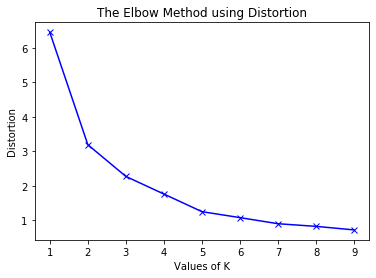

In [42]:
import matplotlib.pyplot as plt  

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [43]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
print(kmeans.labels_)

[3 3 3 3 3 0 0 0 0 0 2 2 2 2 2 4 4 4 4 4 1 1 1]


In [44]:
district_venues_filtered = district_venues_sorted.drop(district_venues_sorted.index[[10, 21, 23, 25, 27]])
singapore_filtered = singapore_merged_with_lat_lng.drop(singapore_merged_with_lat_lng.index[[10, 21, 23, 25, 27]])

In [45]:
# add clustering labels

district_venues_filtered.insert(0, 'Cluster Labels', kmeans.labels_)


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
singapore_merged = singapore_filtered.join(district_venues_filtered.set_index('District'), on='Postal district')




In [46]:
# singapore_merged['Cluster Labels'] = singapore_merged['Cluster Labels'] .astype(int)
singapore_merged.head(20) # check the last columns!

,Postal district,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,1.284375,103.853078,3,Hotel,Waterfront,Event Space,Gym,Coffee Shop,Plaza,French Restaurant,Performing Arts Venue,Concert Hall,Gym / Fitness Center
1,2,1.273565,103.847644,3,Japanese Restaurant,Coffee Shop,Hotel,Café,Bakery,Restaurant,Cocktail Bar,Food Court,Gym / Fitness Center,Seafood Restaurant
2,3,1.288887,103.819350,3,Chinese Restaurant,Coffee Shop,Food Court,Supermarket,Park,Café,Fast Food Restaurant,Italian Restaurant,Bakery,Malay Restaurant
3,4,1.256267,103.828101,3,Theme Park Ride / Attraction,Theme Park,Hotel,Scenic Lookout,Chinese Restaurant,German Restaurant,Toy / Game Store,Spa,Asian Restaurant,General Entertainment
4,5,1.303816,103.770351,3,Asian Restaurant,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Food Court,Supermarket,College Cafeteria,Sandwich Place,Indian Restaurant,Café
5,6,1.297170,103.857365,0,Hotel,Café,Shopping Mall,Event Space,Restaurant,Cocktail Bar,Performing Arts Venue,Italian Restaurant,Art Gallery,Japanese Restaurant
6,7,1.301521,103.858383,0,Hotel,Thai Restaurant,Coffee Shop,Bakery,Café,Italian Restaurant,Indian Restaurant,Cocktail Bar,French Restaurant,Restaurant
7,8,1.309364,103.853258,0,Indian Restaurant,Café,Chinese Restaurant,Bakery,Hotel,Vegetarian / Vegan Restaurant,Restaurant,Soup Place,Ice Cream Shop,Dim Sum Restaurant
8,9,1.302829,103.835287,0,Hotel,Boutique,Shopping Mall,Department Store,Cosmetics Shop,Japanese Restaurant,Clothing Store,Sushi Restaurant,Bakery,Café
9,10,1.321161,103.796443,0,Bakery,Bus Station,Food Court,Pizza Place,Ice Cream Shop,Coffee Shop,Indian Restaurant,Café,Pool,Spa


In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_merged['latitude'], singapore_merged['longitude'], singapore_merged['Postal district'], singapore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
 
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [45]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 0, singapore_merged.columns[[1] + list(range(4, singapore_merged.shape[1]))]]

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,1.297170,Hotel,Café,Shopping Mall,Event Space,Italian Restaurant,Japanese Restaurant,Coffee Shop,Cocktail Bar,Bakery,Performing Arts Venue
6,1.301521,Hotel,Coffee Shop,Bakery,Thai Restaurant,Cocktail Bar,Indian Restaurant,French Restaurant,Café,Restaurant,Italian Restaurant
7,1.309364,Indian Restaurant,Café,Chinese Restaurant,Hotel,Bakery,Soup Place,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Sporting Goods Shop
8,1.302829,Hotel,Boutique,Shopping Mall,Sushi Restaurant,Department Store,Cosmetics Shop,Japanese Restaurant,Clothing Store,Bakery,Yoga Studio
9,1.321161,Bakery,Pizza Place,Food Court,Park,Coffee Shop,Bus Station,Ice Cream Shop,Indian Restaurant,Metro Station,Pool


In [142]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 1, singapore_merged.columns[[1] + list(range(4, singapore_merged.shape[1]))]]

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,1.367996,Café,Coffee Shop,American Restaurant,Food Court,Supermarket,Noodle House,Italian Restaurant,Indian Restaurant,Trail,Metro Station
24,1.430696,Food Court,Fast Food Restaurant,Shopping Mall,Coffee Shop,Café,Supermarket,Fried Chicken Joint,Grocery Store,Japanese Restaurant,Indian Restaurant
26,1.439196,Coffee Shop,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Indian Restaurant,Thai Restaurant,Food Court,Italian Restaurant,Café,Park


In [143]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 2, singapore_merged.columns[[1] + list(range(4, singapore_merged.shape[1]))]]

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,1.335452,Chinese Restaurant,Seafood Restaurant,Coffee Shop,Asian Restaurant,Food Court,Bakery,Dessert Shop,Noodle House,Thai Restaurant,Playground
12,1.333721,Chinese Restaurant,Food Court,Coffee Shop,Convenience Store,Fast Food Restaurant,Noodle House,Café,Asian Restaurant,Bus Station,Soccer Stadium
13,1.320358,Chinese Restaurant,Food Court,Asian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Coffee Shop,BBQ Joint,Supermarket,Noodle House,Bubble Tea Shop
14,1.302571,Hotel,Café,Indian Restaurant,Bakery,Cocktail Bar,Japanese Restaurant,Coffee Shop,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
15,1.322442,Food Court,Coffee Shop,Malay Restaurant,Asian Restaurant,Noodle House,Dessert Shop,Bus Station,Café,Chinese Restaurant,Playground


In [144]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 3, singapore_merged.columns[[1] + list(range(4, singapore_merged.shape[1]))]]

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.284375,Hotel,Waterfront,Event Space,Gym,Plaza,Coffee Shop,Cocktail Bar,Japanese Restaurant,Seafood Restaurant,French Restaurant
1,1.273565,Japanese Restaurant,Coffee Shop,Hotel,Café,Bakery,Food Court,Cocktail Bar,Restaurant,Gym / Fitness Center,Ramen Restaurant
2,1.288887,Chinese Restaurant,Coffee Shop,Food Court,Supermarket,Café,Park,Fast Food Restaurant,Malay Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant
3,1.256267,Theme Park Ride / Attraction,Theme Park,Scenic Lookout,Chinese Restaurant,Hotel,German Restaurant,Multiplex,Resort,General Entertainment,Asian Restaurant
4,1.303816,Coffee Shop,Food Court,Fast Food Restaurant,Asian Restaurant,College Cafeteria,Sandwich Place,Café,Chinese Restaurant,Supermarket,Bus Station


In [145]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 4, singapore_merged.columns[[1] + list(range(4, singapore_merged.shape[1]))]]

,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,1.381244,Resort,Café,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Food Court,Bus Station,Malay Restaurant,Coffee Shop,Hotel
17,1.352105,Coffee Shop,Café,Bakery,Japanese Restaurant,Fried Chicken Joint,Gym,Supermarket,Thai Restaurant,Clothing Store,Shopping Mall
18,1.387796,Fast Food Restaurant,Food Court,Coffee Shop,Asian Restaurant,Snack Place,Metro Station,Noodle House,Bakery,Gym,Supermarket
19,1.361927,Food Court,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Dessert Shop,Asian Restaurant,Japanese Restaurant,BBQ Joint,Park,Pet Store
20,1.333109,Café,Chinese Restaurant,Bakery,Korean Restaurant,Bus Station,Asian Restaurant,Food Court,Dim Sum Restaurant,Supermarket,Shopping Mall


In [48]:
number_of_venues = singapore_venues.groupby('District').count()

In [49]:
number_of_venues = number_of_venues.drop(number_of_venues.index[[10, 21, 23, 25, 27]])

In [50]:
number_of_venues.head(25)

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
1,100,100,100,100,100,100
2,100,100,100,100,100,100
3,83,83,83,83,83,83
4,100,100,100,100,100,100
5,86,86,86,86,86,86
6,100,100,100,100,100,100
7,100,100,100,100,100,100
8,100,100,100,100,100,100
9,100,100,100,100,100,100


In [61]:
freqency_of_venues = number_of_venues.filter(['Venue'], axis=1)

In [62]:
freqency_of_venues.reset_index()

,District,Venue
0,1,100
1,2,100
2,3,83
3,4,100
4,5,86
5,6,100
6,7,100
7,8,100
8,9,100
9,10,82


In [63]:
districts_to_drop = [11,22,24,26,28]

price_data_500_to_600_sqf_df_filtered = price_data_500_to_600_sqf_df[~price_data_500_to_600_sqf_df['District'].isin(districts_to_drop)]

In [64]:
price_merged_with_venues = freqency_of_venues.join(price_data_500_to_600_sqf_df_filtered.set_index('District'), on='District')

In [65]:
price_merged_with_venues = price_merged_with_venues.reset_index()

In [66]:
price_merged_with_venues.head(26)

,District,Venue,$/sqf
0,1,100,3150
1,2,100,3200
2,3,83,2700
3,4,100,2800
4,5,86,2400
5,6,100,3983
6,7,100,3300
7,8,100,2500
8,9,100,2950
9,10,82,2525


In [67]:
min_price = price_merged_with_venues['$/sqf'].min()
max_price = price_merged_with_venues['$/sqf'].max()
interval = (max_price - min_price)/3

buckets = [min_price, (min_price + interval), (max_price - interval), max_price]
price_merged_with_venues['bucket'] = pd.cut(price_merged_with_venues['$/sqf'], bins = buckets, labels=False,include_lowest=True)

print(buckets)


[1700, 2461.0, 3222.0, 3983]


In [68]:
import matplotlib.pyplot as plt

In [69]:
price_merged_with_venues['colours'] = price_merged_with_venues['bucket'].apply(lambda x: 'g' if x == 0 else 'y' if x==1 else 'r')
price_merged_with_venues.head(25)

,District,Venue,$/sqf,bucket,colours
0,1,100,3150,1,y
1,2,100,3200,1,y
2,3,83,2700,1,y
3,4,100,2800,1,y
4,5,86,2400,0,g
5,6,100,3983,2,r
6,7,100,3300,2,r
7,8,100,2500,1,y
8,9,100,2950,1,y
9,10,82,2525,1,y


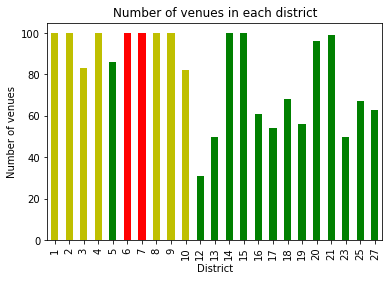

In [70]:
# loop_index = [0, 22]
# red_yellow_green = []

# for i in loop_index:
    
#     if price_merged_with_venues[''$/sqf''][i] >= buckets[0] and price_merged_with_venues['$/sqf'][i]<= buckets[1]:
#         red_yellow_green[i] = 'g'
#     elif price_merged_with_venues['$/sqf'][i] < buckets[1] and price_merged_with_venues['$/sqf'][i]<= buckets[2]:
#         red_yellow_green[i] = 'y'
#     else price_merged_with_venues['$/sqf'][i] < buckets[2] and price_merged_with_venues['$/sqf'][i]<= buckets[3]:
#         red_yellow_green[i] = 'r'
        
price_merged_with_venues.plot(x="District", y='Venue', kind="bar", color=price_merged_with_venues['colours'], title = 'Number of venues in each district', legend = False)

plt.ylabel('Number of venues')

plt.show()

In [71]:
clusters_df = singapore_merged[['Postal district', 'Cluster Labels']].copy()

In [72]:
clusters_df.head()

,Postal district,Cluster Labels
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3


In [73]:
price_clusters_merged = price_merged_with_venues.join(clusters_df.set_index('Postal district'), on='District')
price_clusters_merged.head(25)

,District,Venue,$/sqf,bucket,colours,Cluster Labels
0,1,100,3150,1,y,3
1,2,100,3200,1,y,3
2,3,83,2700,1,y,3
3,4,100,2800,1,y,3
4,5,86,2400,0,g,3
5,6,100,3983,2,r,0
6,7,100,3300,2,r,0
7,8,100,2500,1,y,0
8,9,100,2950,1,y,0
9,10,82,2525,1,y,0


['#00b5eb', '#00b5eb', '#00b5eb', '#00b5eb', '#00b5eb', '#ffb360', '#ffb360', '#ffb360', '#ffb360', '#ffb360', '#8000ff', '#8000ff', '#8000ff', '#8000ff', '#8000ff', '#80ffb4', '#80ffb4', '#80ffb4', '#80ffb4', '#80ffb4', '#ff0000', '#ff0000', '#ff0000']


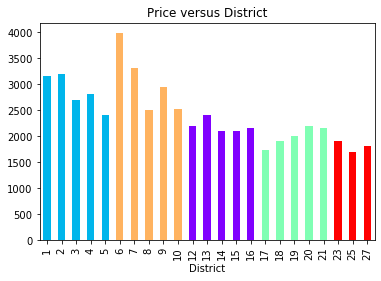

In [74]:
colour_range = []
for i in price_clusters_merged['Cluster Labels']:
        colour_range.append(rainbow[i-2])

print(colour_range)    
ax = price_clusters_merged.plot(x="District", y='$/sqf', kind="bar", color=colour_range, title = 'Price versus District', legend = False)

# plt.ylabel('Number of venues')

plt.show()